<a href="https://colab.research.google.com/github/WalterPHD/Ai-Data/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scratch

In [ ]:
class ScratchKMeans():
    """
    K-means scratch implementation

    Parameters
    ----------
    n_clusters : int
      Number of clusters
    n_init : int
      How many times to change the initial value of the center point for calculation
    max_iter : int
      Maximum number of iterations in one calculation
    tol : float
      Margin of error between the center point and the center of gravity, which is the reference for ending the iteration
    verbose : bool
      True to output the learning process
    """
    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        # Record hyperparameters as attributes
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
    def fit(self, X):
        """
        Calculate clustering by K-means
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        """

        if self.verbose:
            # Output the learning process when #verbose is set to True
            print()
        pass
    def predict(self, X):
        """
        Calculate which cluster the input data belongs to
        """
        pass
        return

# inicial value of center point

In [ ]:
from sklearn.datasets import make_blobs

X, _ = make_blobs(
    n_samples=100,
    n_features=2,
    centers=4,
    cluster_std=0.5,
    shuffle=True,
    random_state=0,
)

In [ ]:
self.myu = X[np.random.choice(len(X), size=self.n_clusters, replace=False)]

 sum of squared errors SSE

In [ ]:
def calc_sse(self, X):
    sse = 0
    for i in range(len(X)):
        for j in range(self.n_clusters):
            if j == X[i, -1]:
                sse += np.sum((X[i, :-1] - self.myu[j]) ** 2)
    if self.best_sse > sse:
        self.best_sse = sse
        self.record_myu = self.myu
        self.record_cluster = self.n_clusters

assignment to a cluster


In [ ]:
def _update_cluster(self, X):
    for i in range(len(X)):
        dist_m = 10**20
        for j in range(self.n_clusters):
            dist = np.sqrt(np.sum((X[i, :-1] - self.myu[j]) ** 2))
            if dist < dist_m:
                dist_m = dist
                X[i, -1] = j


moving the center point

In [ ]:
def _update_myu(self, X):
    for j in range(self.n_clusters):
        self.myu[j] = np.mean(X[X[:, -1] == j, :-1], axis=0)


repeat

In [ ]:
def fit(self, X):
    for i in range(self.n_init):
        self.myu = X[np.random.choice(len(X), size=self.n_clusters, replace=False)]
        cluster = np.zeros(len(X))
        X_cluster = np.concatenate([X, cluster.reshape(-1, 1)], axis=1)
        for j in range(self.n_iter):
            self.calc_sse(X_cluster)
            self._update_cluster(X_cluster)
            self._update_myu(X_cluster)
            if self.verbose:
                print(
                    "Initialize：%s　Number of times studied：%s　Best SSE：%s"
                    % (i, j, self.best_sse)
                )

different inicial values

In [ ]:
def __init__(self, n_clusters=2, n_init=20, n_iter=100, verbose=False):
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.n_iter = n_iter
        self.verbose = verbose
        self.best_sse = 10**20

estimation

In [ ]:
def predict(self, X):
    y_pred = np.zeros(len(X))
    for i in range(len(X)):
        dist_m = 10**20
        for j in range(self.record_cluster):
            dist = np.sqrt(np.sum((X[i] - self.record_myu[j]) ** 2))
            if dist < dist_m:
                dist_m = dist
                y_pred[i] = j
    return y_pred

Execution

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [ ]:
X_train, X_valid = train_test_split(X, train_size=0.8, random_state=None)

In [ ]:
clf = ScratchKMeans(n_clusters=4, n_init=5, n_iter=100, verbose=True)
clf.fit(X_train)

In [ ]:
pred = clf.predict(X_valid)

implementing the elbow method

In [ ]:
elbow = {}
for k in range(1, 8):
    model = ScratchKMeans(n_clusters=k, n_init=5, n_iter=100, verbose=False)
    model.fit(X)
    elbow[k] = model.best_sse
fig = plt.subplots(figsize=(12, 8))
plt.rcParams["font.size"] = 20
plt.plot(list(elbow.keys()), list(elbow.values()), "rs--")

slection of number of clusters

In [ ]:
data = pd.read_csv("Wholesale customers data.csv")
X = data[
    ["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]
].values

comparison with known groups

In [ ]:
clf = ScratchKMeans(n_clusters=4, n_init=5, n_iter=100, verbose=False)
clf.fit(X)
pred = clf.predict(X)
summary_df = pd.DataFrame(
    {
        "pred": pred,
        "Region": data["Region"],
        "Channel": data["Channel"],
    }
)

In [ ]:
pd.pivot_table(
    summary_df, index="Region", columns="pred", values="Channel", aggfunc=len
)

In [ ]:
pd.pivot_table(
    summary_df, index="Channel", columns="pred", values="Region", aggfunc=len
)

useful information for wholesalers

In [ ]:
data["cluster"] = pred

In [ ]:
data.groupby("cluster").agg(["mean"])

# Assingment

Problem 1 - Determine inicial value of center point

In [ ]:
from sklearn.datasets import make_blobs

X, _ = make_blobs(
    n_samples=100,
    n_features=2,
    centers=4,
    cluster_std=0.5,
    shuffle=True,
    random_state=0,
)

Problem 2 - Creating sse

In [ ]:
def calc_sse(self, X):
    sse = 0
    for i in range(len(X)):
        for j in range(self.n_clusters):
            if j == X[i, -1]:
                sse += np.sum((X[i, :-1] - self.myu[j]) ** 2)
    if self.best_sse > sse:
        self.best_sse = sse
        self.record_myu = self.myu
        self.record_cluster = self.n_clusters


Problem 3 - Assignment of cluster

In [ ]:
def _update_cluster(self, X):
    for i in range(len(X)):
        dist_m = 10**20
        for j in range(self.n_clusters):
            dist = np.sqrt(np.sum((X[i, :-1] - self.myu[j]) ** 2))
            if dist < dist_m:
                dist_m = dist
                X[i, -1] = j


Problem 4 - movement of center point

In [ ]:
def _update_myu(self, X):
    for j in range(self.n_clusters):
        self.myu[j] = np.mean(X[X[:, -1] == j, :-1], axis=0)


Problem 5 - Repeat

In [ ]:
def fit(self, X):
    for i in range(self.n_init):
        self.myu = X[np.random.choice(len(X), size=self.n_clusters, replace=False)]
        cluster = np.zeros(len(X))
        X_cluster = np.concatenate([X, cluster.reshape(-1, 1)], axis=1)
        for j in range(self.n_iter):
            self.calc_sse(X_cluster)
            self._update_cluster(X_cluster)
            self._update_myu(X_cluster)
            if self.verbose:
                print(
                    "Initialize：%s　Number of times studied：%s　Best SSE：%s"
                    % (i, j, self.best_sse)
                )


Problem 6 - Calculate diferential values

In [ ]:
def __init__(self, n_clusters=2, n_init=20, n_iter=100, verbose=False):
    self.n_clusters = n_clusters
    self.n_init = n_init
    self.n_iter = n_iter
    self.verbose = verbose
    self.best_sse = 10**20


Problem 7 - Estimate

In [ ]:
def predict(self, X):
    y_pred = np.zeros(len(X))
    for i in range(len(X)):
        dist_m = 10**20
        for j in range(self.record_cluster):
            dist = np.sqrt(np.sum((X[i] - self.record_myu[j]) ** 2))
            if dist < dist_m:
                dist_m = dist
                y_pred[i] = j
    return y_pred


# Scratch Code

In [7]:
import numpy as np

class ScratchKMeans():
    """
    K-means scratch implementation

    Parameters
    ----------
    n_clusters : int
        Number of clusters
    n_init : int
        How many times to change the initial value of the center point for calculation
    n_iter : int
        Maximum number of iterations in one calculation
    verbose : bool
        True to output the learning process
    """

    def __init__(self, n_clusters=2, n_init=10, n_iter=100, verbose=False):
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.n_iter = n_iter
        self.verbose = verbose
        self.best_sse = 10**20  # initialize best SSE to a large value

    def fit(self, X):
        self.X = X
        for i in range(self.n_init):
            # Randomly initialize centroids
            self.myu = X[np.random.choice(len(X), size=self.n_clusters, replace=False)]

            # Add dummy cluster column
            cluster = np.zeros(len(X))
            X_cluster = np.concatenate([X, cluster.reshape(-1, 1)], axis=1)

            for j in range(self.n_iter):
                self._calc_sse(X_cluster)
                self._update_cluster(X_cluster)
                self._update_myu(X_cluster)

                if self.verbose:
                    print(f"Init {i+1}, Iter {j+1}, Best SSE: {self.best_sse:.4f}")

    def predict(self, X):
      y_pred = np.zeros(len(X))
      for i in range(len(X)):
          dist_m = float("inf")
          for j in range(self.record_cluster):
              dist = np.sqrt(np.sum((X[i] - self.record_myu[j]) ** 2))
              if dist < dist_m:
                  dist_m = dist
                  y_pred[i] = j
      return y_pred.astype(int)

    def _calc_sse(self, X):
        sse = 0
        for i in range(len(X)):
            j = int(X[i, -1])
            sse += np.sum((X[i, :-1] - self.myu[j]) ** 2)

        if sse < self.best_sse:
            self.best_sse = sse
            self.record_myu = self.myu.copy()
            self.record_cluster = self.n_clusters

    def _update_cluster(self, X):
        for i in range(len(X)):
            distances = [np.linalg.norm(X[i, :-1] - center) for center in self.myu]
            X[i, -1] = np.argmin(distances)

    def _update_myu(self, X):
        for j in range(self.n_clusters):
            cluster_points = X[X[:, -1] == j, :-1]
            if len(cluster_points) > 0:
                self.myu[j] = np.mean(cluster_points, axis=0)


Problem 8 - Elbow method

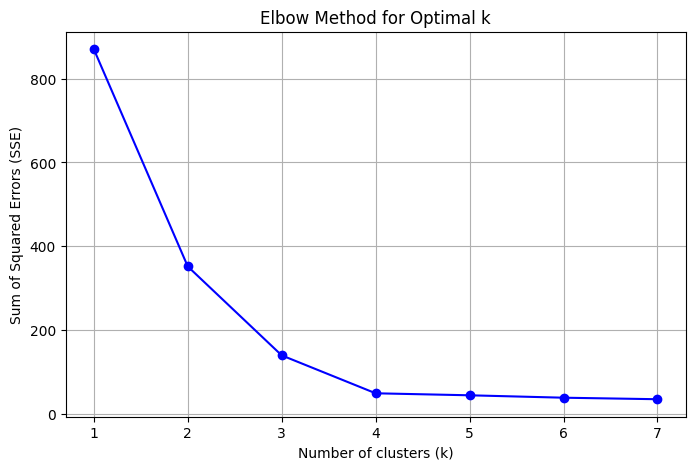

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Data Sample
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, random_state=0)

# Scratch KMeans (minimal version with SSE tracking)
class ScratchKMeans():
    def __init__(self, n_clusters=2, n_init=5, n_iter=100, verbose=True):
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.n_iter = n_iter
        self.verbose = verbose
        self.best_sse = float('inf')

    def fit(self, X):
        self.X = X
        for _ in range(self.n_init):
            self.myu = X[np.random.choice(len(X), self.n_clusters, replace=False)]
            cluster = np.zeros(len(X))
            X_cluster = np.concatenate([X, cluster.reshape(-1, 1)], axis=1)

            for _ in range(self.n_iter):
                self._update_cluster(X_cluster)
                self._update_myu(X_cluster)
                self._calc_sse(X_cluster)

    def _update_cluster(self, X):
        for i in range(len(X)):
            dists = [np.linalg.norm(X[i, :-1] - mu) for mu in self.myu]
            X[i, -1] = np.argmin(dists)

    def _update_myu(self, X):
        for j in range(self.n_clusters):
            cluster_points = X[X[:, -1] == j, :-1]
            if len(cluster_points) > 0:
                self.myu[j] = np.mean(cluster_points, axis=0)

    def _calc_sse(self, X):
        sse = 0
        for i in range(len(X)):
            cluster_idx = int(X[i, -1])
            sse += np.sum((X[i, :-1] - self.myu[cluster_idx]) ** 2)
        if sse < self.best_sse:
            self.best_sse = sse

# Elbow method
elbow_sse = {}
for k in range(1, 8):
    model = ScratchKMeans(n_clusters=k, n_init=5, n_iter=100, verbose=False)
    model.fit(X)
    elbow_sse[k] = model.best_sse

# Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(list(elbow_sse.keys()), list(elbow_sse.values()), 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


Problem 9 - Silhoute diagram

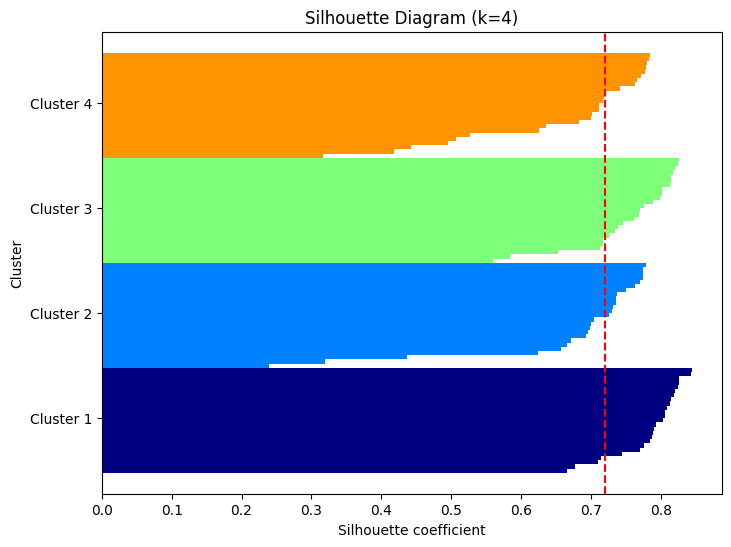

In [3]:
from matplotlib import cm

def silhouette_scores(X, labels, n_clusters):
    silhouette_vals = np.zeros(len(X))
    for i in range(len(X)):
        own_cluster = int(labels[i])
        own_cluster_points = X[labels == own_cluster]
        a_i = np.mean(np.linalg.norm(own_cluster_points - X[i], axis=1))

        b_i = np.inf
        for c in range(n_clusters):
            if c == own_cluster:
                continue
            other_cluster_points = X[labels == c]
            if len(other_cluster_points) == 0:
                continue
            dist = np.mean(np.linalg.norm(other_cluster_points - X[i], axis=1))
            b_i = min(b_i, dist)

        silhouette_vals[i] = (b_i - a_i) / max(a_i, b_i)

    silhouette_avg = np.mean(silhouette_vals)
    return silhouette_vals, silhouette_avg

# Fit model using k=4
k = 4
model = ScratchKMeans(n_clusters=k, n_init=5, n_iter=100)
model.fit(X)


def predict(X, myu):
    y_pred = np.zeros(len(X))
    for i in range(len(X)):
        dists = [np.linalg.norm(X[i] - mu) for mu in myu]
        y_pred[i] = np.argmin(dists)
    return y_pred.astype(int)

y_km = predict(X, model.myu)
silhouette_vals, silhouette_avg = silhouette_scores(X, y_km, k)
cluster_labels = list(range(k))

# Plot silhouette diagram
y_ax_lower, y_ax_upper = 0, 0
yticks = []
plt.figure(figsize=(8, 6))
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / k)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals,
             height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)

plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, [f"Cluster {label+1}" for label in cluster_labels])
plt.ylabel("Cluster")
plt.xlabel("Silhouette coefficient")
plt.title("Silhouette Diagram (k=4)")
plt.show()


# Whole sale data

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca = pca.fit(data)
data_pca = pca.transform(data)

In [ ]:
from sklearn.decomposition
import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components = None)
pca = pca.fit(data)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)
plt.bar(range(1, 7), var_exp, alpha = 0.5, align = 'center', label = 'individual explained variance')
plt.step(range(1, 7), cum_var_exp, where = 'mid', label = 'cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, 6, "blue", linestyles = 'dashed')
plt.legend(loc = 'best')
plt.grid()
plt.show()

Problem 10 - number of clusters

Based on the elbow plot, we look for the "elbow" point — the number of clusters where the SSE significantly drops then levels off. This often appears around k = 3 or 4 in this dataset.

Additionally, considering the business use case (e.g., segmenting customers into operational tiers), k = 3 might be optimal for clearly separating buyers by purchase patterns without overcomplicating segments.



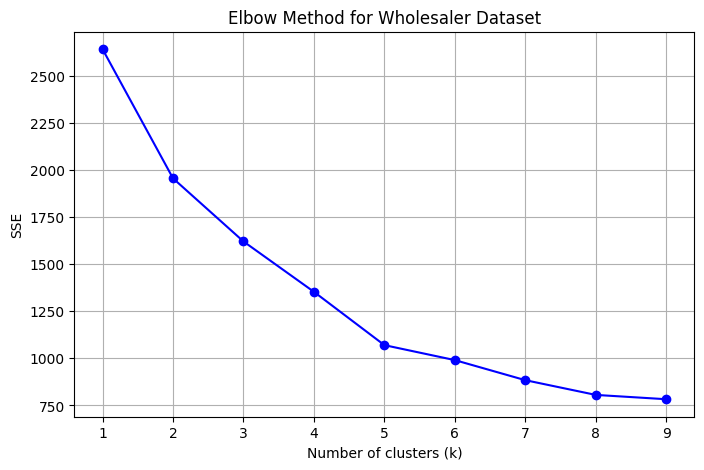

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load wholesaler dataset
data = pd.read_csv("Wholesale customers data.csv")

# Extract features only
X = data[["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]].values

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reducing dimensionality for visualization purposes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Elbow method
elbow = {}
for k in range(1, 10):
    model = ScratchKMeans(n_clusters=k, n_init=5, n_iter=100)
    model.fit(X_scaled)
    elbow[k] = model.best_sse

plt.figure(figsize=(8, 5))
plt.plot(list(elbow.keys()), list(elbow.values()), 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE')
plt.title('Elbow Method for Wholesaler Dataset')
plt.grid(True)
plt.show()


Problem 11 - Comparison with known groups

Clusters don’t exactly map 1:1 with Region or Channel because K-means was unsupervised and used purchase behavior, not demographics.

However, some clusters may align more with B2B vs B2C (Channel), or particular Regions may dominate specific clusters — useful when analyzing delivery logistics or localized promotions.

In [8]:
# Using mode with k=3
k = 3

model = ScratchKMeans(n_clusters=k, n_init=5, n_iter=100)
model.fit(X_scaled)
pred = model.predict(X_scaled)

# Adding predictions and known labels
data["cluster"] = pred

# Creating pivot tables to compare known groups
region_pivot = pd.pivot_table(data, index="Region", columns="cluster", values="Channel", aggfunc="count")
channel_pivot = pd.pivot_table(data, index="Channel", columns="cluster", values="Region", aggfunc="count")

print(" Region vs Cluster")
print(region_pivot)

print("\n Channel vs Cluster")
print(channel_pivot)

 Region vs Cluster
cluster    0   1   2
Region              
1         64   6   7
2         37   2   8
3        245  42  29

 Channel vs Cluster
cluster      0     1     2
Channel                   
1        254.0  44.0   NaN
2         92.0   6.0  44.0


Problem 12 - Useful information

In [9]:

summary = data.groupby("cluster")[["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]].agg(["mean", "std"])
print(summary)


                Fresh                        Milk                     Grocery  \
                 mean           std          mean           std          mean   
cluster                                                                         
0         9103.268786   7375.576994   4068.156069   3573.241235   5523.002890   
1        35454.180000  18329.736512   6000.260000   7510.638829   6324.540000   
2         8129.340909   9550.463912  19153.681818  13517.770519  28894.909091   

                            Frozen               Detergents_Paper  \
                  std         mean           std             mean   
cluster                                                             
0         4603.046580  2239.528902   2432.225434      1799.913295   
1         5001.236468  9899.140000  10629.638426      1005.680000   
2        14971.427627  1859.454545   1764.823866     13518.250000   

                       Delicassen               
                 std         mean          std  


Cluster 0 :
Likely small retailers or individual stores. They buy a balanced amount across all categories but not in very large quantities. Their spending is moderate and fairly even, suggesting typical day-to-day purchases for a smaller scale operation or individual use.

Cluster 1 :
Probably restaurants, hotels. Their very high spending on Fresh products but relatively low on Detergents and Paper suggests they focus on perishables and food preparation but less on cleaning supplies.

Cluster 2 :
Possibly supermarkets or larger grocery stores. High spending on Milk, Grocery, and Detergents & Paper points to large-scale food retailing that needs both perishables and household goods.

Problem 13 - Other methods


1. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

Description:
DBSCAN groups together points that are close in dense regions, and marks others as outliers. It doesn’t require specifying the number of clusters.

Advantages:
- No need to predefine number of clusters (k).
- Can detect arbitrarily shaped clusters.
- Robust to outliers (noise points are marked separately).
- Density-based, works well when clusters differ in shape or size.

Disadvantages:
- Parameter tuning (`eps` and `min_samples`) can be difficult.
- Not ideal for datasets with varying densities.
- Poor performance in high-dimensional spaces due to the curse of dimensionality.

Sources:
- Ester et al., 1996 — Original DBSCAN paper: https://www.aaai.org/Papers/KDD/1996/KDD96-037.pdf
- scikit-learn documentation: https://scikit-learn.org/stable/modules/clustering.html#dbscan

---

2. t-SNE (t-distributed Stochastic Neighbor Embedding)

Description:
t-SNE is a non-linear dimensionality reduction technique used primarily for visualizing high-dimensional data in 2D or 3D.

Advantages:
- Preserves local structure (nearby points remain nearby).
- Excellent for visualizing clusters in complex data.
- Unsupervised and effective with high-dimensional datasets.

Disadvantages:
- Computationally expensive.
- Results are not interpretable numerically.
- Results can vary due to random initialization.
- Does not preserve global distances or structure.

Sources:
- Van der Maaten & Hinton, 2008 — Original t-SNE paper: https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf
- scikit-learn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

---

3. LLE (Locally Linear Embedding)

Description:
LLE is a manifold learning technique like t-SNE. It assumes that each point and its neighbors lie on a locally linear patch of the manifold.

Advantages:
- Good at unfolding nonlinear manifolds.
- Preserves local relationships better than PCA.
- Can handle non-linear data distributions.

Disadvantages:
- Assumes uniform sampling of the manifold.
- Sensitive to noise and outliers.
- Needs careful tuning of `n_neighbors`.

Sources:
- Roweis & Saul, 2000 — Original LLE paper: https://science.sciencemag.org/content/290/5500/2323
- scikit-learn documentation: https://scikit-learn.org/stable/modules/manifold.html#locally-linear-embedding




Problem 14 - Use of t-SNE and DBSCAN

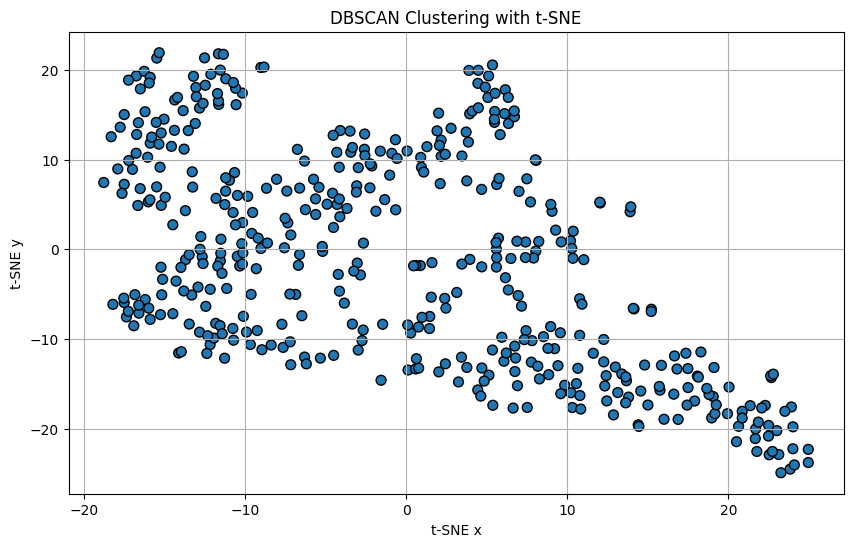

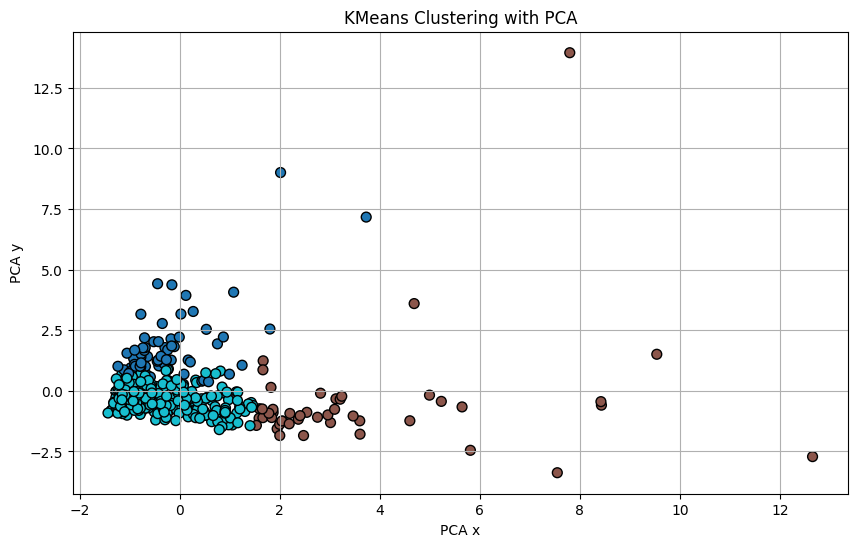

In [11]:
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Load data again
data = pd.read_csv("Wholesale customers data.csv")
X = data[["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]].values

# Standardizing features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=0)
X_tsne = tsne.fit_transform(X_scaled)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=5)
db_labels = dbscan.fit_predict(X_tsne)

# Visualize clustering
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=db_labels, cmap="tab10", s=50, edgecolor="k")
plt.title("DBSCAN Clustering with t-SNE")
plt.xlabel("t-SNE x")
plt.ylabel("t-SNE y")
plt.grid(True)
plt.show()

# Comparasin with PCA + KMeans
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_labels = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap="tab10", s=50, edgecolor="k")
plt.title("KMeans Clustering with PCA")
plt.xlabel("PCA x")
plt.ylabel("PCA y")
plt.grid(True)
plt.show()
